# 1. Import any modules as you need

In [1]:
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

In [2]:
######################### Stats
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',999)
pd.set_option('float.format','{:f}'.format)
np.set_printoptions(precision=2)

from scipy.stats import pearsonr
import statsmodels.api as sm
# import statsmodels.formula.api as smf

from scipy.stats.mstats import winsorize

######################### Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

######################### Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

######################### Data Analysis
### Categorical Variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
### Discretize Continuous Numerical Variables
# convert numerical values into binary values based on a threshold
# divide continuous features into discrete intervals (bins)
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

### Missing Values
from sklearn.impute import SimpleImputer, KNNImputer

### Scaler - Extreme Values 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,\ 
PowerTransformer, FunctionTransformer

### Transform 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures

### Feature Engineering
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.decomposition import PCA, IncrementalPCA

### Sampling 
from sklearn.model_selection import KFold, StratifiedKFold, LeavePOut, ShuffleSplit, TimeSeriesSplit
from sklearn.model_selection import train_test_split

######################### Modeling 

import lightgbm as lgb
import xgboost as xbg
from catboost import CatBoostRegressor

### Classification
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

######################### Metrics
### Regression & Classification 
from sklearn.metrics import mean_squared_error, r2_score,\
confusion_matrix, roc_curve, precision_recall_curve, classification_report, roc_auc_score,auc,\
accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV

### Feature Importance
from sklearn.inspection import permutation_importance



# 2. Read input data

In [3]:
df = pd.read_csv(r"interview_train.csv")
display(df.head())
display(df.shape)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,49.359178,-21.626783,0.829029,10.305796,14.607746,0.524993,8.373217,1.200000,NaN,25.851422,-0.002612,-10.337725,1.607982,0.550908,0.666995,0
1,55.649128,-20.337816,8.870142,7.548730,14.523496,-0.042865,9.662184,1.200000,-2.380146,26.037642,0.216839,-9.582749,-1.438016,0.024510,0.027207,0
2,58.116093,-18.346651,9.974673,9.716283,18.677543,NaN,11.653349,1.200000,NaN,26.445252,-0.967697,-8.306297,-2.954746,240.274511,0.441496,0
3,43.452196,-24.003563,9.772460,11.938981,13.110701,2.222492,5.996437,1.200000,NaN,23.760152,1.282298,-10.742232,-0.439987,1.818539,10.968514,0
4,56.175669,-19.596168,0.022057,5.993732,13.447700,-1.228364,10.403832,1.200000,0.416888,24.844529,0.253979,-9.019813,0.417531,0.415434,0.248882,0


(1000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   x6      937 non-null    float64
 6   x7      1000 non-null   float64
 7   x8      1000 non-null   float64
 8   x9      265 non-null    float64
 9   x10     1000 non-null   float64
 10  x11     1000 non-null   float64
 11  x12     1000 non-null   float64
 12  x13     1000 non-null   float64
 13  x14     1000 non-null   float64
 14  x15     1000 non-null   float64
 15  y       1000 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 125.1 KB


# 3. Investigate data set

In [ ]:
##### basic EDA 
profile = ProfileReport(df, title="Profiling Report")

profile

## 3.1 Identify Numerical & Categorical Variables

In [54]:
# cols = df.columns[:-1]

categorical_features = ['x8']

numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_features.remove('y')

print(f'Categorical features: {categorical_features}')
print(f'Numerical features: {numerical_features}')


Categorical features: ['x8']
Numerical features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']


## 3.2 Missing Values & Sparsity

In [6]:
##### infinite values 
np.isinf(df).sum().to_frame().T


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
##### missing values 
pd.isnull(df).sum().to_frame().T

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,0,0,0,0,0,63,0,0,735,0,0,0,0,0,0,0


,Missing Pct
x9,73.50%
x6,6.30%
x1,0.00%
x2,0.00%
x3,0.00%
x4,0.00%
x5,0.00%
x7,0.00%
x8,0.00%
x10,0.00%


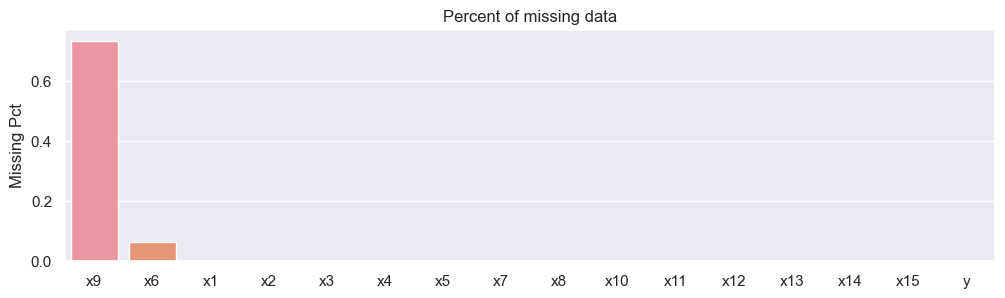

In [8]:
##### viz 
missing_pct = df.isnull().sum()/df.shape[0]
missing_pct = missing_pct.to_frame().rename(columns={0:'Missing Pct'}).sort_values(by='Missing Pct', ascending=False)#.T.style.format('{:.2%}')

display(missing_pct.style.format('{:.2%}'))

plt.figure(figsize=(12,3))
sns.barplot(x=missing_pct.index, y=missing_pct['Missing Pct'])
# plt.xticks(rotation=45)
plt.title('Percent of missing data')
plt.show();



In [9]:
##### rows with large pct of missing values 
def check_sparsity_rows(df, remove_threshold=1):
    remove_row = list(df[df.isnull().mean(axis=1) > remove_threshold].index)
    keep_row = list(df[df.isnull().mean(axis=1) <= remove_threshold].index)

    print(f'Percent of Removed Rows: {len(remove_row)/df.shape[0]:.2%}')
    return keep_row

keep_row = check_sparsity_rows(df, remove_threshold=0.8)
df_cleaned = df.loc[keep_row, :]

print("after cleaned shape: ", df_cleaned.shape)


Percent of Removed Rows: 0.00%
after cleaned shape:  (1000, 16)


## 3.3 Features Distribution

In [10]:
quantile = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
df.describe(quantile).style.format('{:.2f}')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
count,1000.00,1000.00,1000.00,1000.00,1000.00,937.00,1000.00,1000.00,265.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,51.52,-20.85,4.51,10.14,15.63,0.03,9.71,1.37,-0.14,25.21,0.04,-9.29,-0.02,17.44,7.27,0.20
std,6.09,2.06,3.30,2.46,2.41,1.02,3.94,0.32,1.06,1.03,1.33,1.06,1.75,94.63,26.69,0.40
min,26.71,-28.27,0.00,1.62,7.99,-2.95,1.73,1.20,-3.56,21.80,-8.39,-12.78,-11.25,-3.16,0.00,0.00
1%,37.56,-25.49,0.01,5.32,9.96,-2.24,4.51,1.20,-2.83,22.80,-3.17,-11.72,-4.16,-2.24,0.01,0.00
10%,44.02,-23.50,0.28,6.79,12.58,-1.30,6.54,1.20,-1.31,23.91,-1.44,-10.59,-1.67,-1.24,0.09,0.00
25%,47.32,-22.23,1.30,8.42,14.05,-0.70,7.79,1.20,-0.88,24.52,-0.68,-10.06,-0.77,-0.59,0.27,0.00
50%,51.53,-20.94,3.96,10.19,15.69,0.03,9.11,1.20,-0.15,25.26,0.01,-9.29,-0.05,0.06,1.03,0.00
75%,55.70,-19.40,7.55,11.80,17.26,0.70,10.71,1.20,0.58,25.90,0.72,-8.56,0.73,0.82,3.92,0.00
90%,59.22,-18.29,9.33,13.32,18.76,1.31,12.11,2.00,1.14,26.49,1.54,-7.98,1.61,1.57,14.86,1.00


<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x1', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x1')

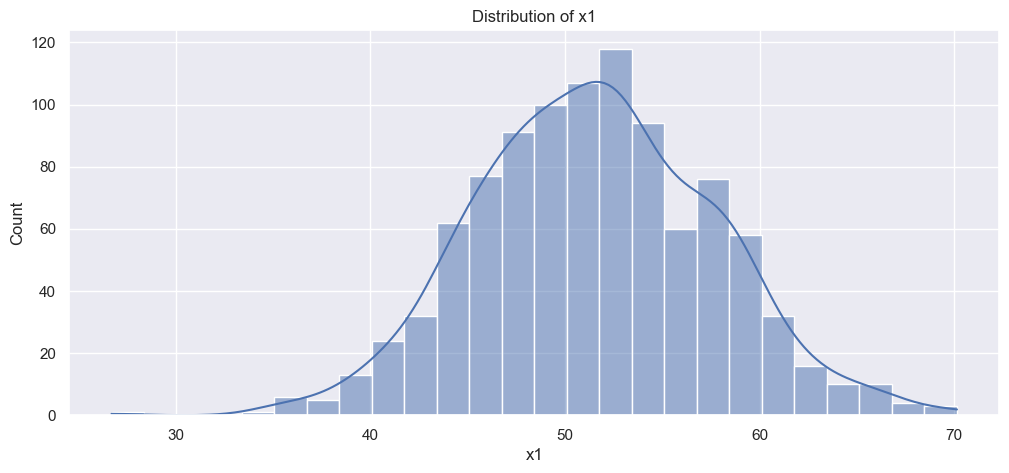

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x2')

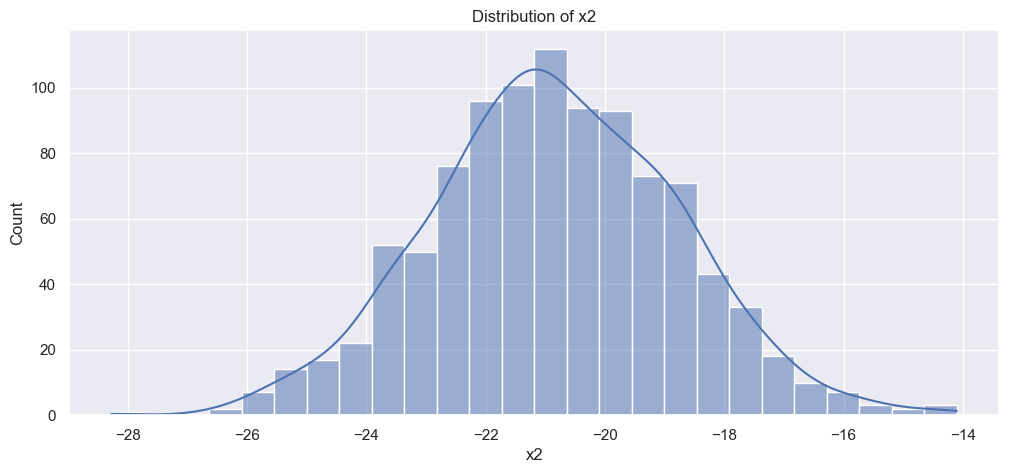

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x3', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x3')

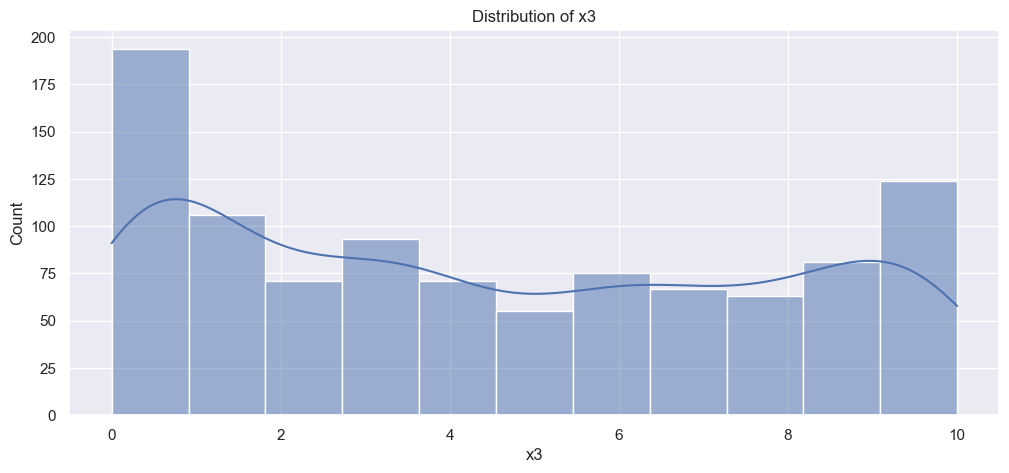

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x4', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x4')

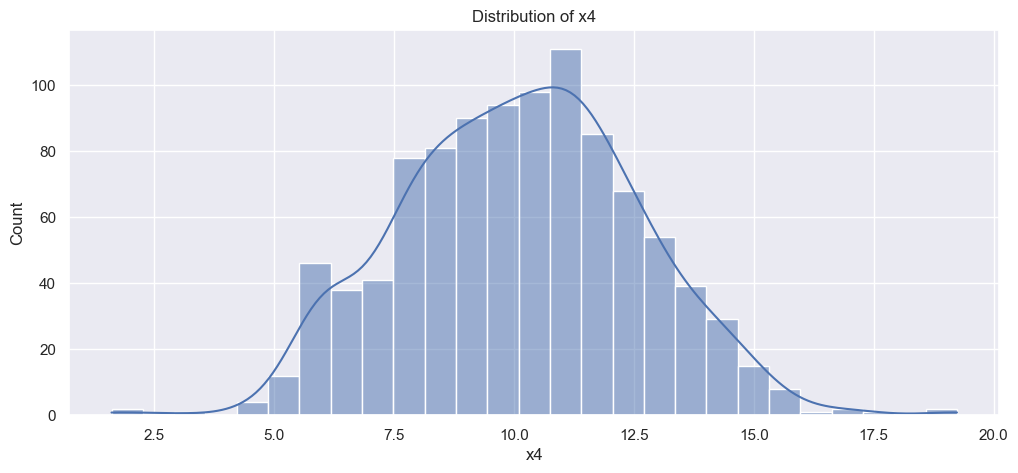

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x5', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x5')

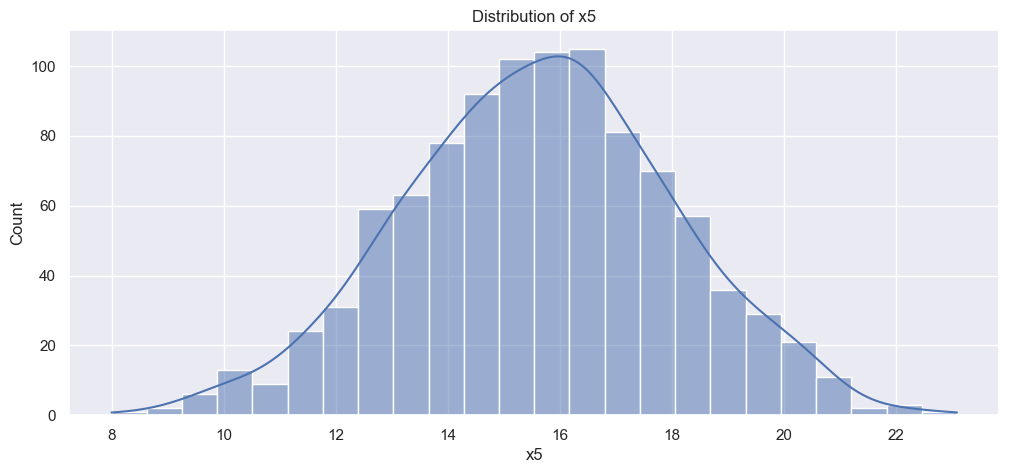

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x6', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x6')

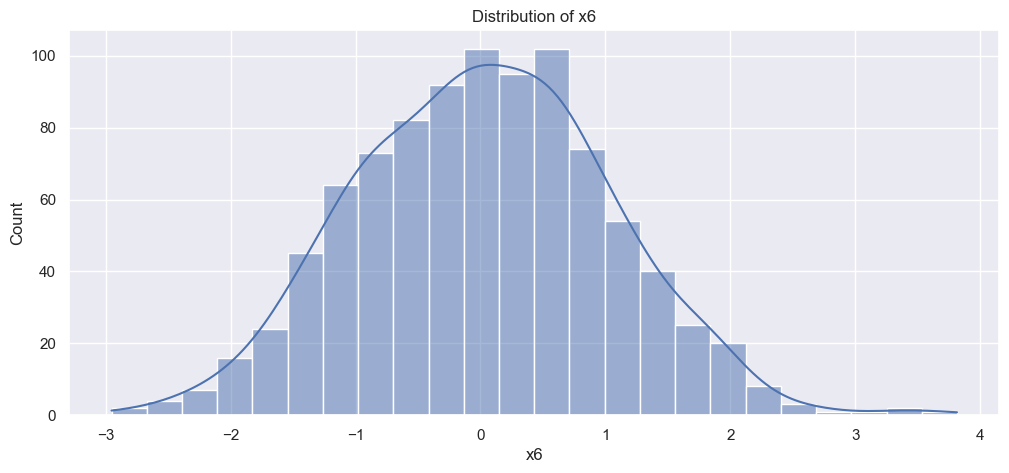

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x7', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x7')

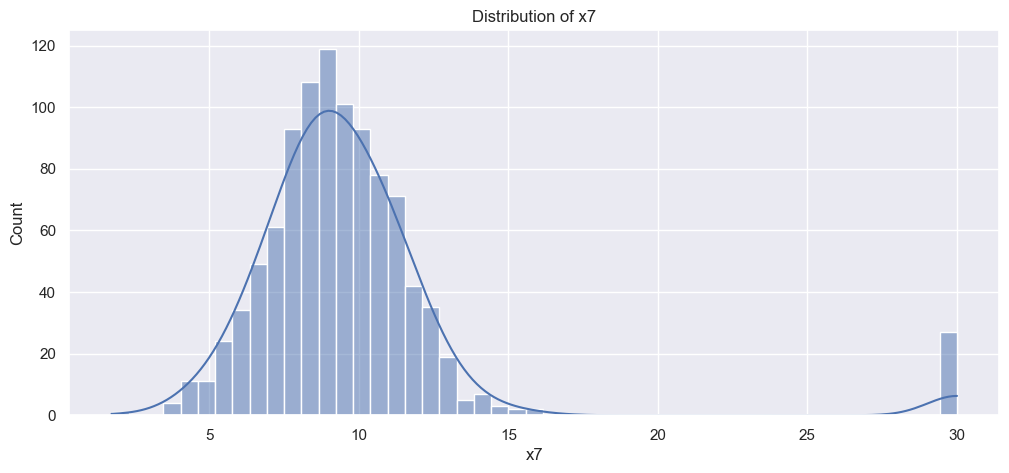

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x8', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x8')

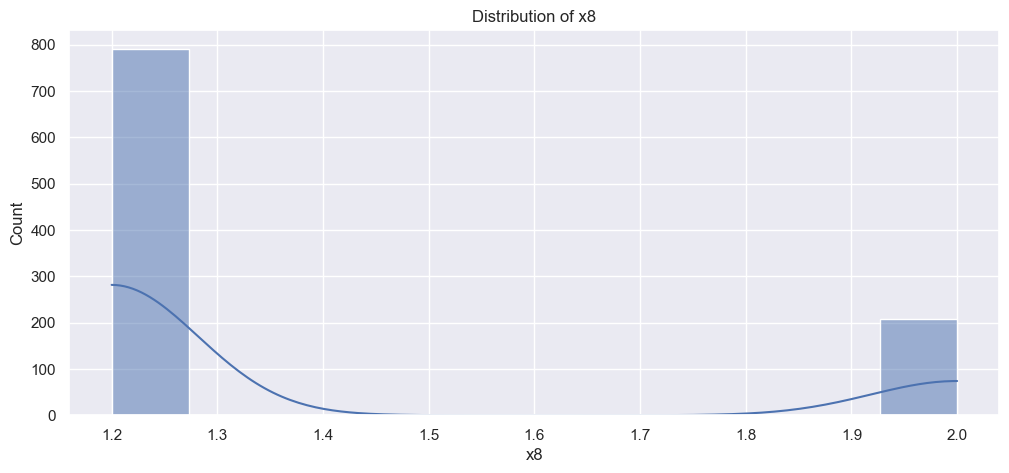

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x9', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x9')

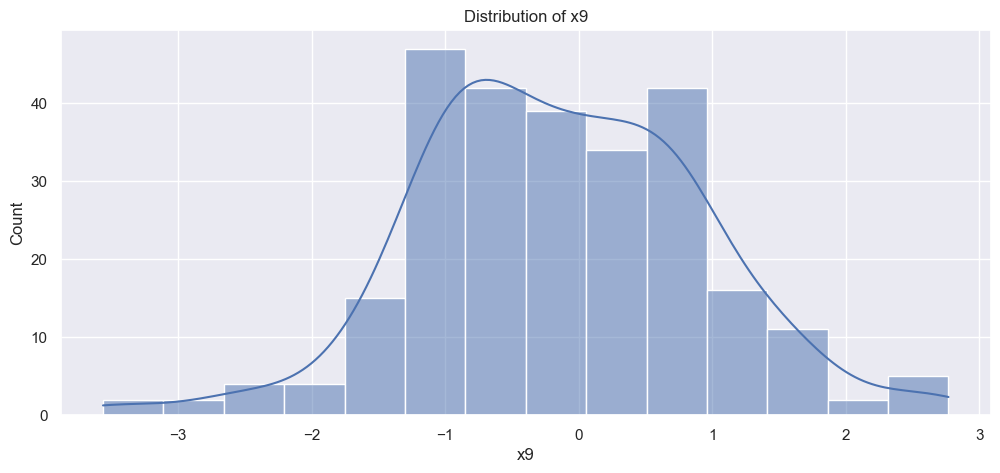

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x10', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x10')

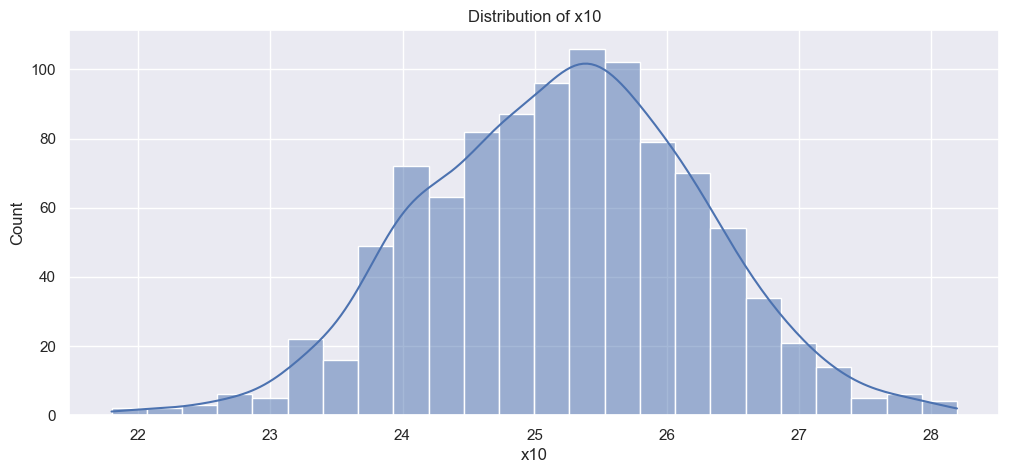

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x11', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x11')

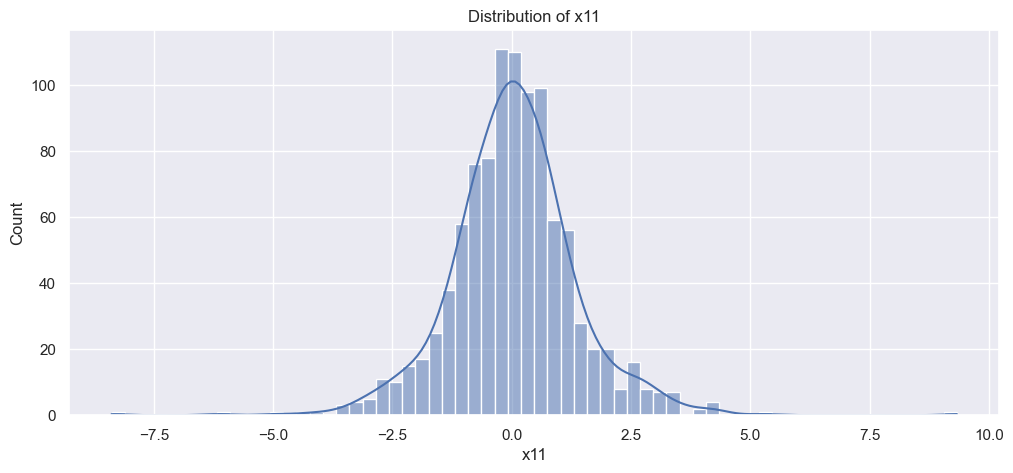

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x12', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x12')

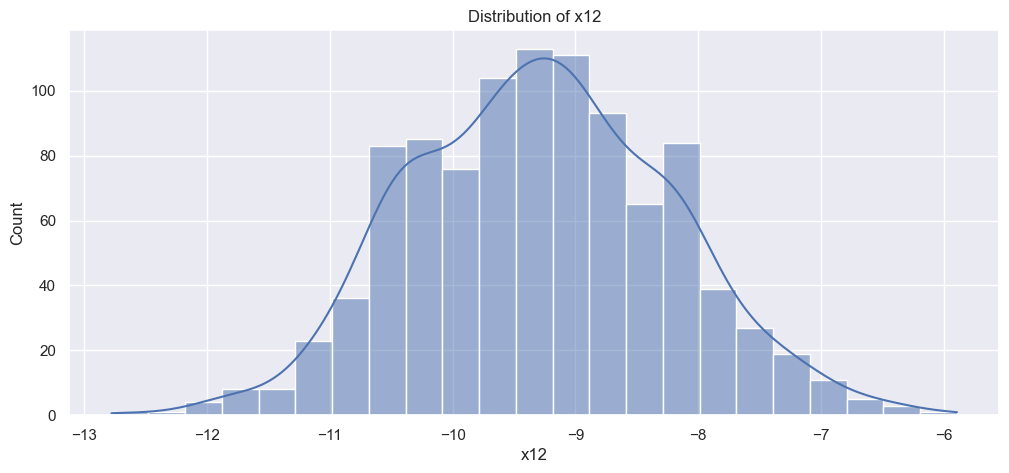

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x13', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x13')

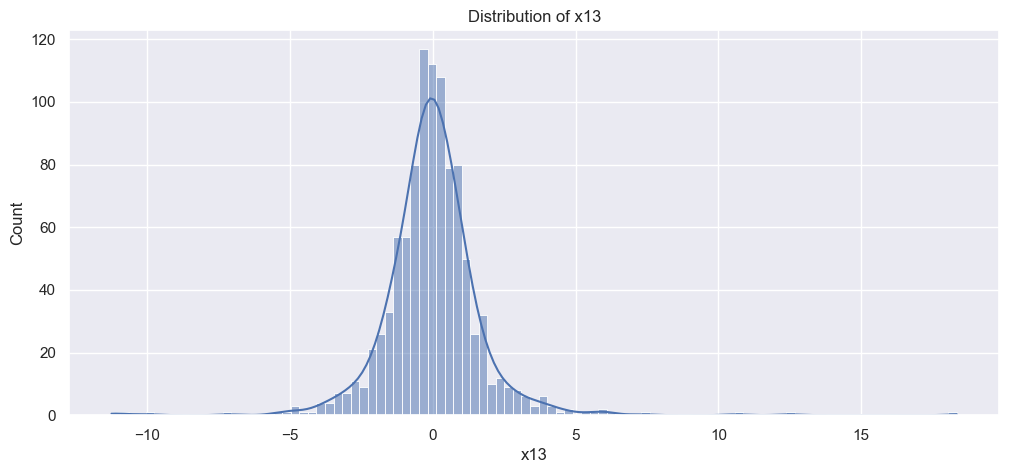

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x14', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x14')

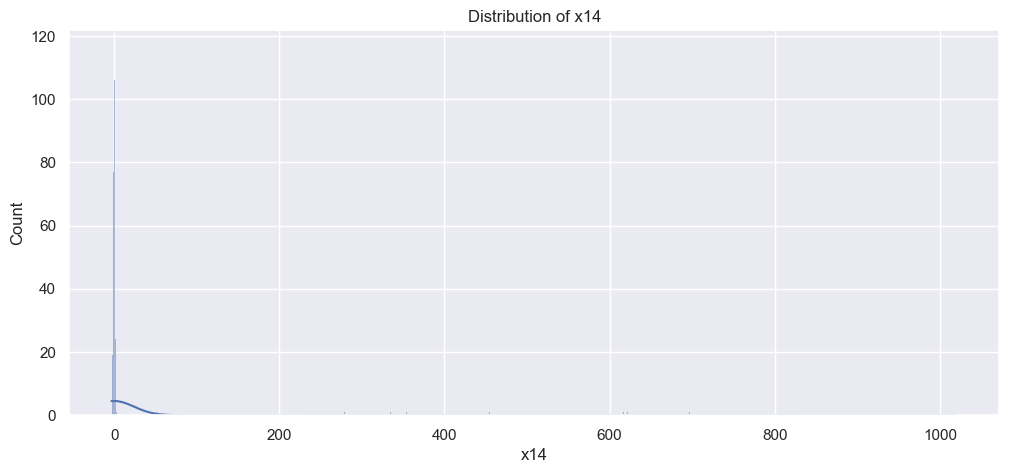

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x15', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of x15')

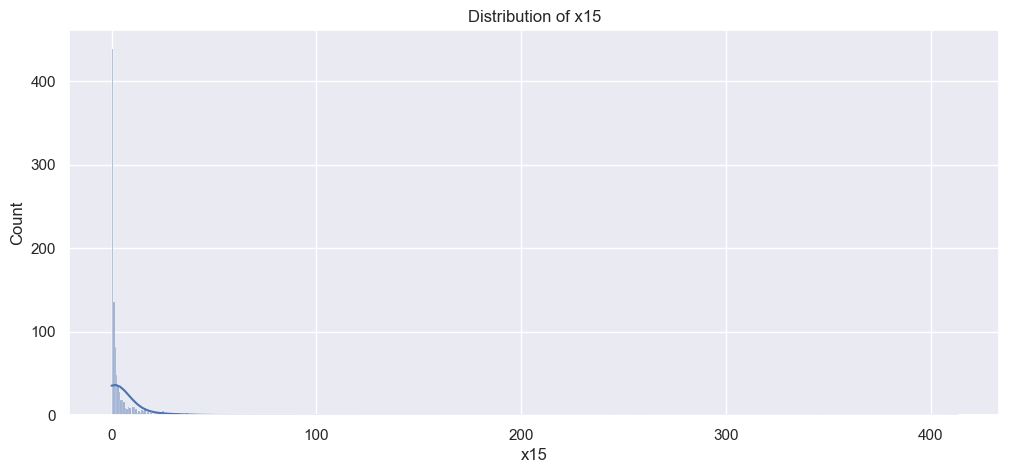

In [57]:
for col in numerical_features:
    plt.figure(figsize=(12,5))
    sns.histplot(df[col], kde=True, legend=col)
    plt.title(f'Distribution of {col}')
    plt.show();
    
# boxcoxTr = PowerTransformer(method = "box-cox", standardize=True)
# yeojohnTr = PowerTransformer(standardize=True)

# df_boxcox = pd.DataFrame(boxcoxTr.fit_transform(df['x3'].values.reshape(-1,1)))
# sns.histplot(df_boxcox,bins=20, kde=True , legend=False)


In [12]:
##### basic features preprocessing 
data = df.copy()

##### extreme values & outliers & dist 
# fix skewness: get a normal or Gaussian-like distribution
data['x7'] = data['x7'].replace(30,np.nan)
data['x14'] = np.sign(data['x14'])*np.log(abs(data['x14']))
data['x15'] = np.log(data['x15'])

##### categorical 
data['x8'] = data['x8'].replace({1.2: 0, 2.0: 1})

##### missing values 
numerical_features.remove('x9')

data.describe(quantile).style.format('{:.2f}')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
count,1000.00,1000.00,1000.00,1000.00,1000.00,937.00,973.00,1000.00,265.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,51.52,-20.85,4.51,10.14,15.63,0.03,9.14,0.21,-0.14,25.21,0.04,-9.29,-0.02,0.19,0.05,0.20
std,6.09,2.06,3.30,2.46,2.41,1.02,2.06,0.41,1.06,1.03,1.33,1.06,1.75,1.74,1.98,0.40
min,26.71,-28.27,0.00,1.62,7.99,-2.95,1.73,0.00,-3.56,21.80,-8.39,-12.78,-11.25,-6.17,-6.36,0.00
1%,37.56,-25.49,0.01,5.32,9.96,-2.24,4.47,0.00,-2.83,22.80,-3.17,-11.72,-4.16,-4.15,-4.47,0.00
10%,44.02,-23.50,0.28,6.79,12.58,-1.30,6.51,0.00,-1.31,23.91,-1.44,-10.59,-1.67,-1.35,-2.41,0.00
25%,47.32,-22.23,1.30,8.42,14.05,-0.70,7.78,0.00,-0.88,24.52,-0.68,-10.06,-0.77,-0.59,-1.30,0.00
50%,51.53,-20.94,3.96,10.19,15.69,0.03,9.06,0.00,-0.15,25.26,0.01,-9.29,-0.05,0.04,0.03,0.00
75%,55.70,-19.40,7.55,11.80,17.26,0.70,10.57,0.00,0.58,25.90,0.72,-8.56,0.73,0.72,1.37,0.00
90%,59.22,-18.29,9.33,13.32,18.76,1.31,11.71,1.00,1.14,26.49,1.54,-7.98,1.61,1.79,2.70,1.00


<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x1', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x1')

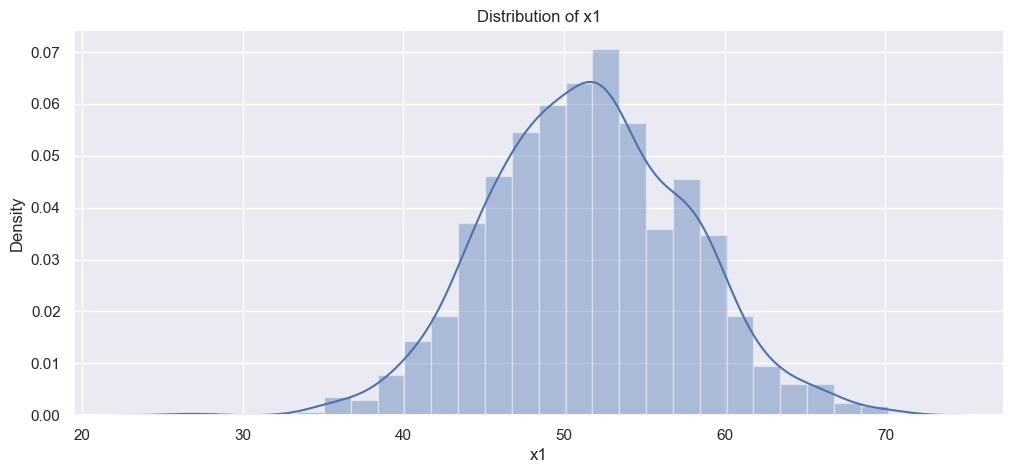

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x2', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x2')

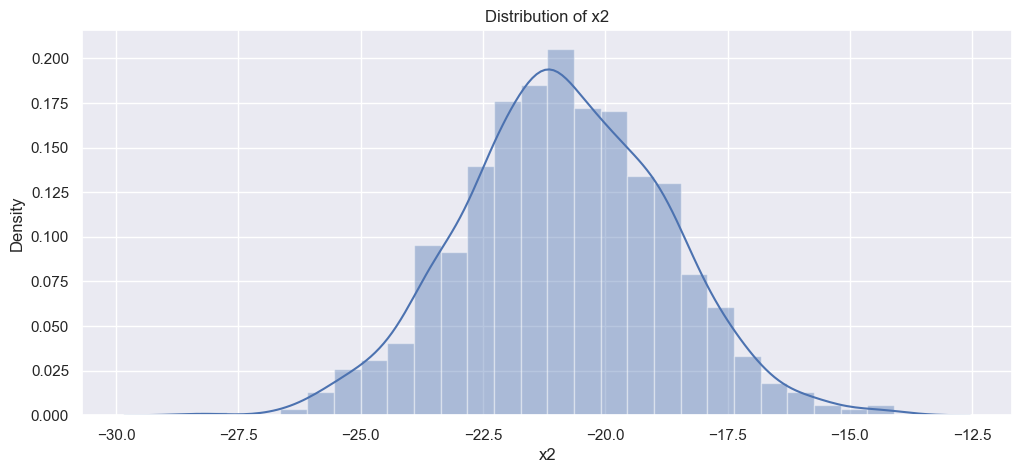

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x3', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x3')

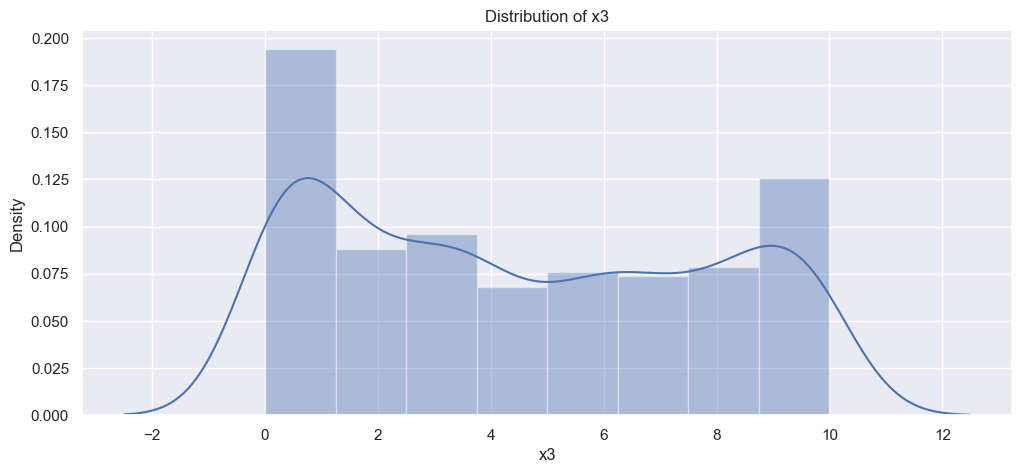

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x4', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x4')

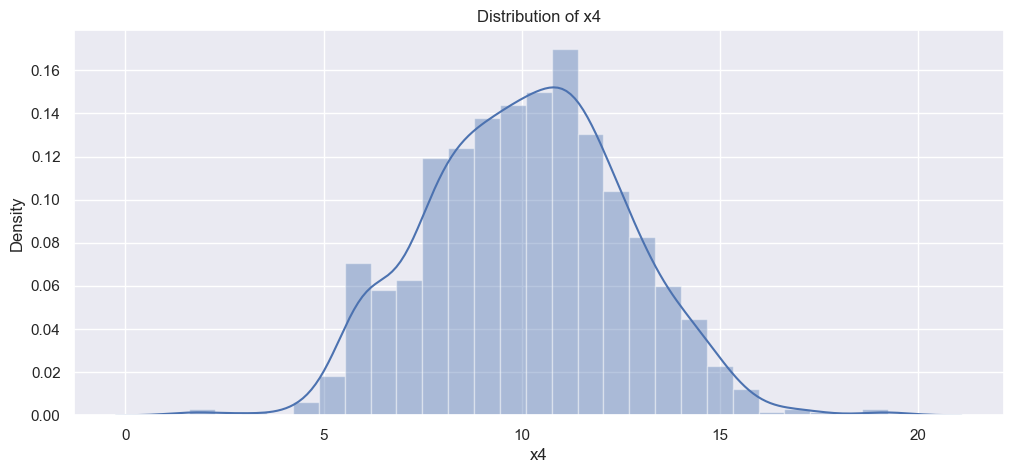

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x5', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x5')

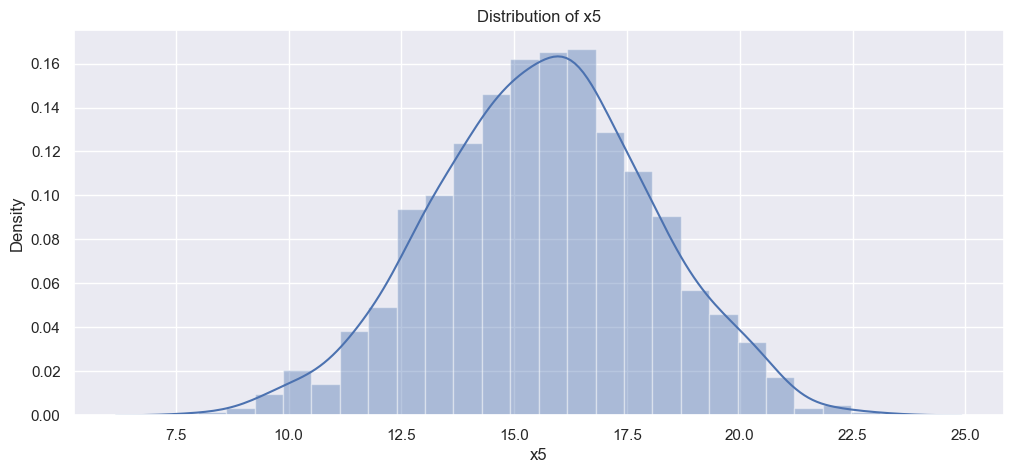

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x6', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x6')

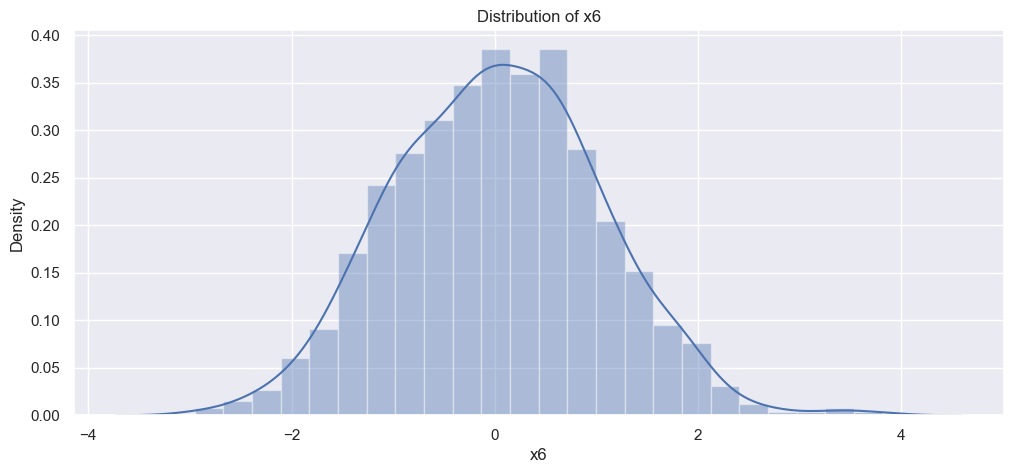

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x7', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x7')

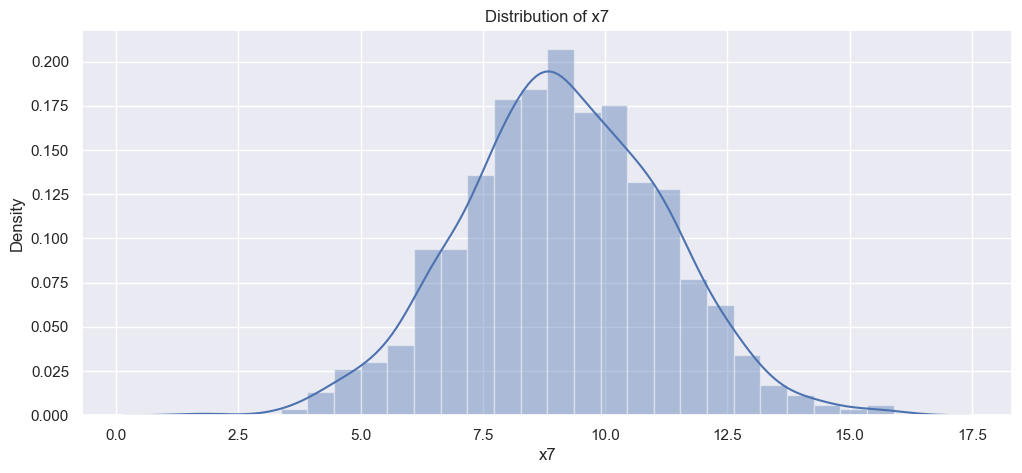

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x8', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x8')

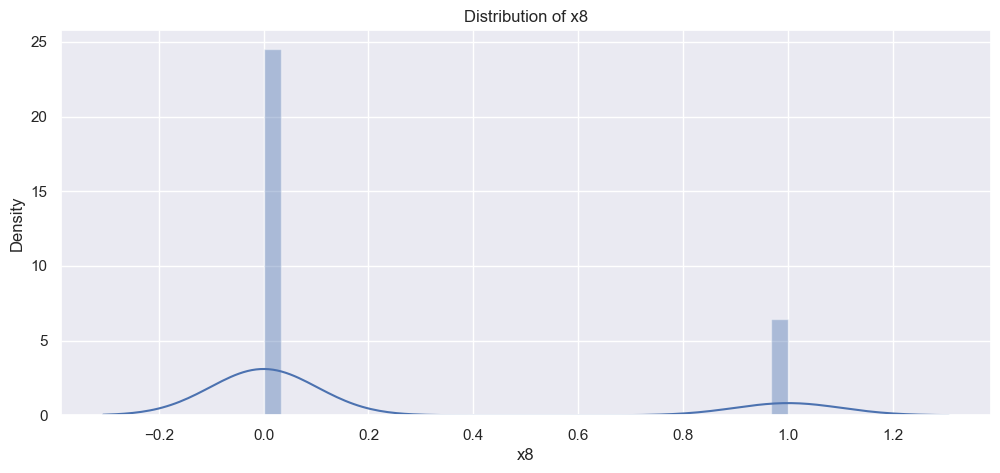

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x10', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x10')

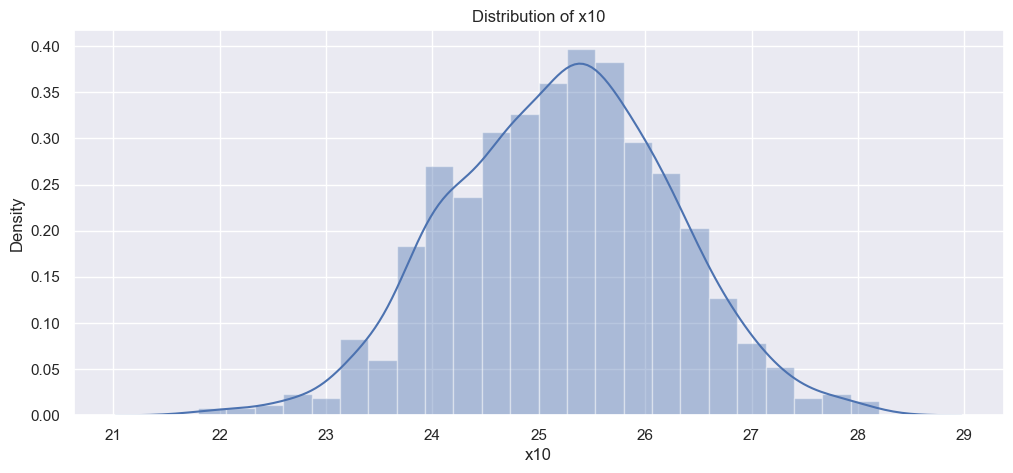

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x11', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x11')

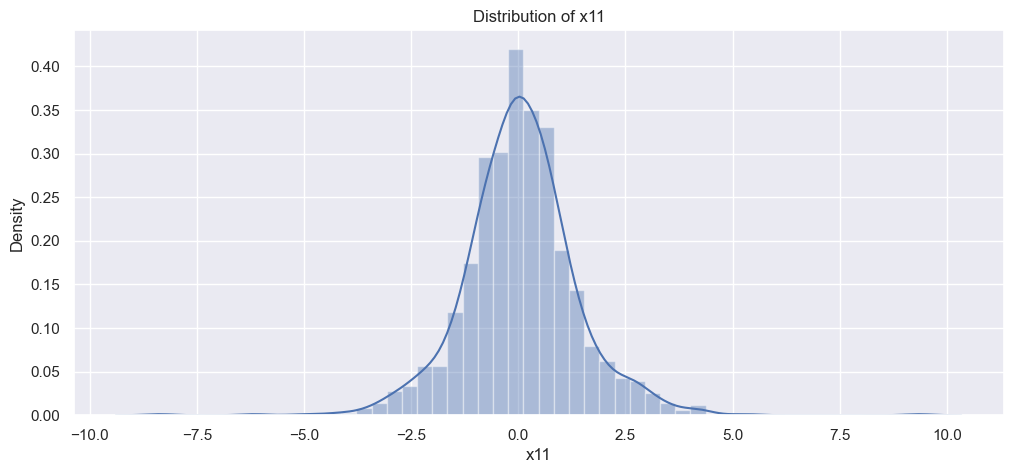

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x12', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x12')

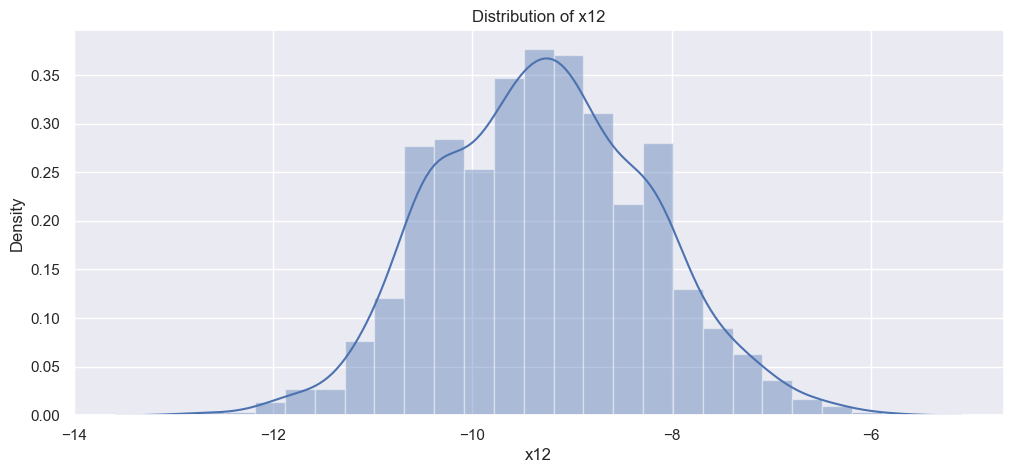

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x13', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x13')

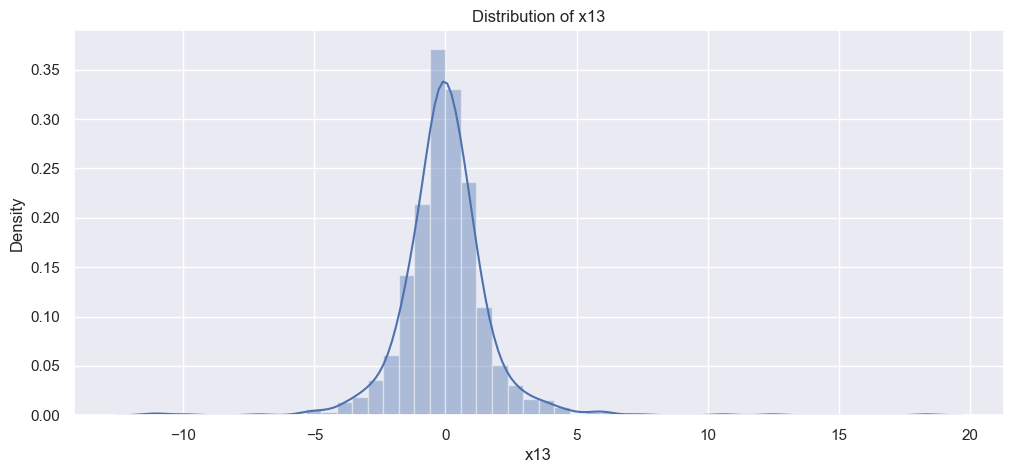

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x14', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x14')

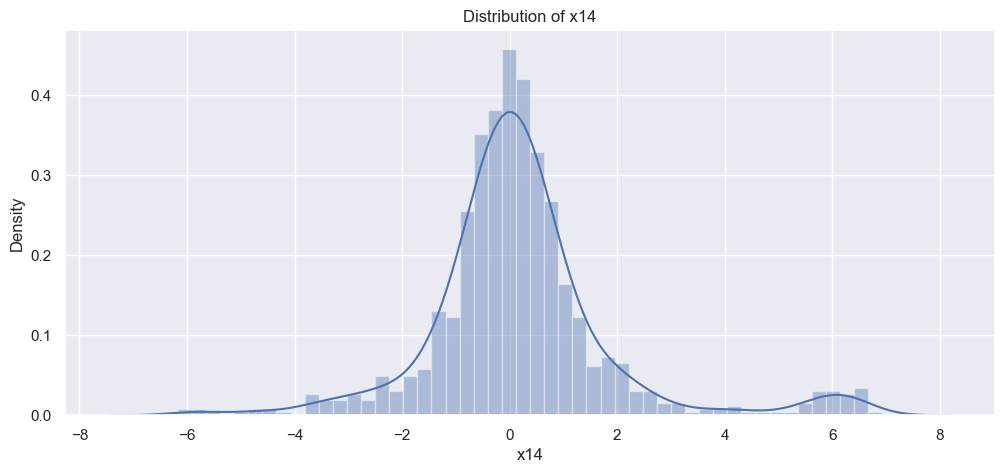

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='x15', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of x15')

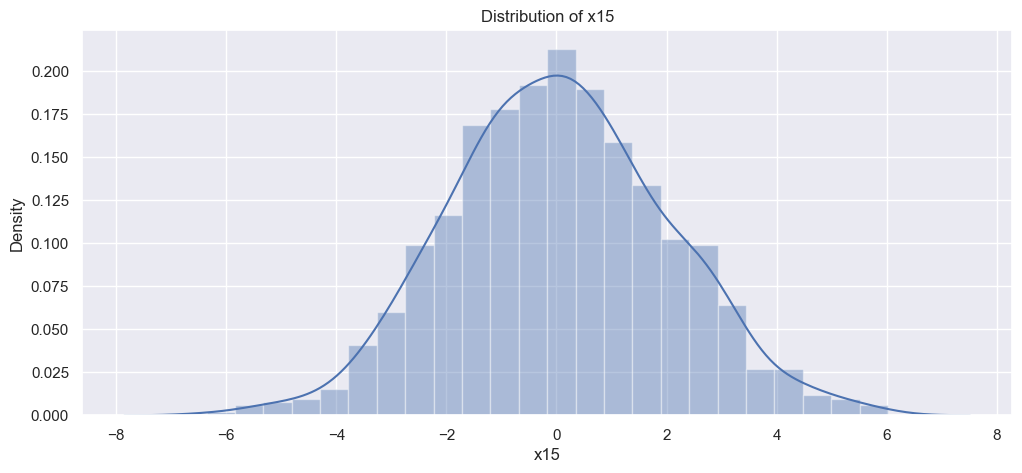

In [13]:
for col in numerical_features:
    plt.figure(figsize=(12,5))
    sns.distplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show();

## 3.4 Extreme Values

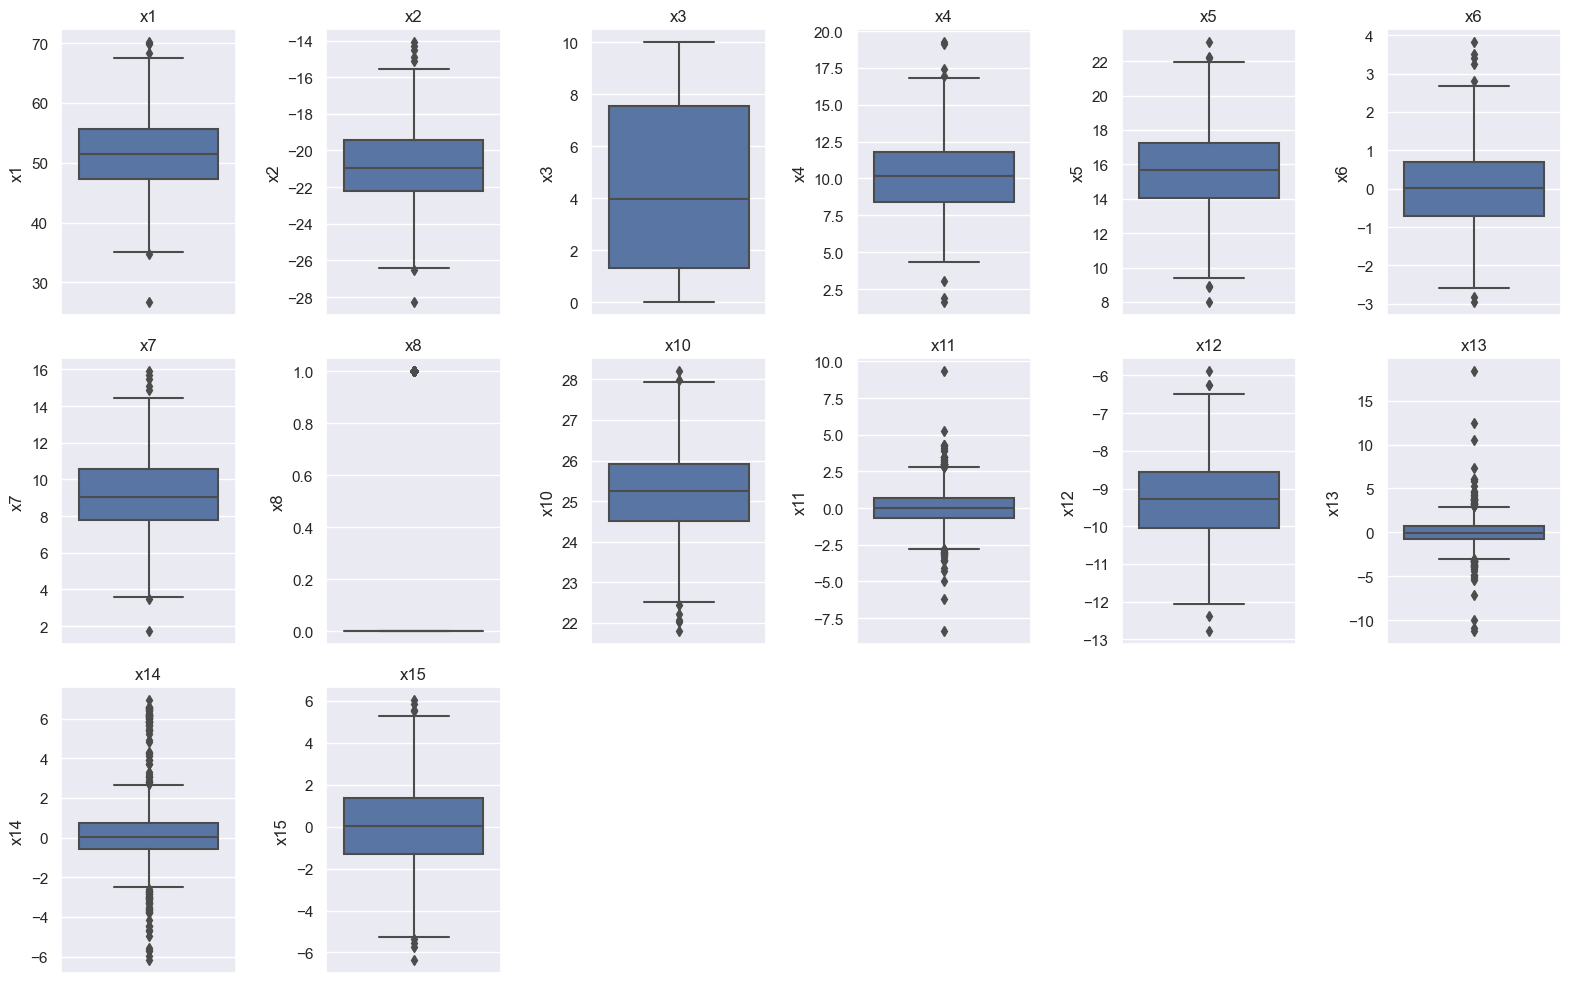

In [14]:
plt.figure(figsize=(16,10))

for i, col in enumerate(numerical_features):    
    plt.subplot(3,6,i + 1)
    sns.boxplot(y=col, data=data)
    plt.title(col)

plt.tight_layout()
plt.show();

## 3.5 Linear relationship

In [15]:
data.corr().style.format('{:.2f}')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
x1,1.00,0.88,0.00,-0.63,0.57,0.01,0.88,0.02,0.01,0.80,-0.02,0.79,-0.03,0.01,-0.01,0.31
x2,0.88,1.00,0.00,-0.57,0.60,0.02,1.00,0.00,0.02,0.85,-0.04,0.91,-0.03,0.02,-0.00,0.34
x3,0.00,0.00,1.00,-0.02,-0.01,0.01,-0.00,0.04,0.05,0.03,0.02,0.03,-0.02,-0.00,0.03,0.01
x4,-0.63,-0.57,-0.02,1.00,0.25,-0.00,-0.57,-0.04,-0.01,-0.54,-0.01,-0.56,0.05,0.05,0.00,-0.14
x5,0.57,0.60,-0.01,0.25,1.00,0.02,0.60,-0.03,0.01,0.50,-0.04,0.51,0.01,0.07,-0.01,0.27
x6,0.01,0.02,0.01,-0.00,0.02,1.00,0.01,0.04,0.05,-0.00,-0.04,0.03,-0.01,-0.05,-0.03,0.10
x7,0.88,1.00,-0.00,-0.57,0.60,0.01,1.00,-0.01,0.03,0.85,-0.04,0.90,-0.03,0.02,-0.01,0.34
x8,0.02,0.00,0.04,-0.04,-0.03,0.04,-0.01,1.00,0.03,0.01,-0.01,0.01,-0.01,-0.02,0.02,0.00
x9,0.01,0.02,0.05,-0.01,0.01,0.05,0.03,0.03,1.00,0.01,0.07,0.03,0.00,0.04,-0.04,0.01
x10,0.80,0.85,0.03,-0.54,0.50,-0.00,0.85,0.01,0.01,1.00,-0.02,0.70,-0.03,-0.00,0.01,0.24


,x4,x11,x14,x8,x3,x13,x9,x6,x10,x5,x1,x12,x7,x2,x15
y,-0.14,-0.02,-0.01,0.00,0.01,0.01,0.01,0.10,0.24,0.27,0.31,0.33,0.34,0.34,0.36


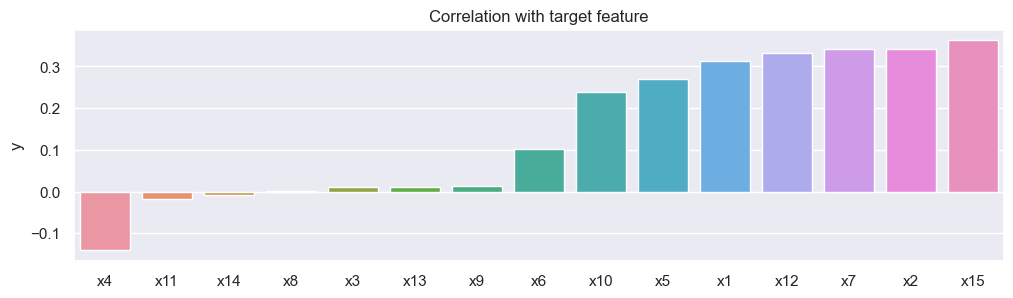

In [34]:
target_variable = 'y'
correlation_matrix = data.corr()
target_correlation = correlation_matrix[target_variable].drop(target_variable).to_frame().sort_values(by=target_variable)

display(target_correlation.T.style.format('{:.2f}'))

plt.figure(figsize=(12,3))
sns.barplot(x=target_correlation.index, y=target_correlation[target_variable])
# plt.xticks(rotation=45)
plt.title('Correlation with target feature')
plt.show();

In [17]:
def PCA_factors(df, limit=5):
    ##### data cleaning 
    imputer = SimpleImputer(strategy='mean')
    df_imputed = df.copy()
    df_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_imputed = imputer.fit_transform(df_imputed)
    
    ##### PCA factors 
    pca = PCA()
    X_pca = pca.fit_transform(df_imputed)
    n_components = len(pca.explained_variance_ratio_)
    explained_variance = pca.explained_variance_ratio_
    cum_explained_variance = np.cumsum(explained_variance)
    idx = np.arange(n_components)+1
    df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                         index=['explained variance', 'cumulative'], 
                                         columns=idx).T
    mean_explained_variance = df_explained_variance.iloc[:,0].mean()  
    print('PCA Overview')
    print('='*40)
    print("Total: {} components".format(n_components))
    print('-'*40)
    print('Mean explained variance:', round(mean_explained_variance,3))
    print('-'*40)
    print(df_explained_variance.head(20))
    print('-'*40)
        
    ##### explaining power 
    df_explained_variance_limited = df_explained_variance.iloc[:limit,:]
    #make scree plot
    fig, ax1 = plt.subplots(figsize=(15,6))
    ax1.set_title('Explained variance across principal components', fontsize=14)
    ax1.set_xlabel('Principal component', fontsize=12)
    ax1.set_ylabel('Explained variance', fontsize=12)
    ax2 = sns.barplot(x=idx[:limit], y='explained variance', data=df_explained_variance_limited, palette='summer')
    ax2 = ax1.twinx()
    ax2.grid(False)
    ax2.set_ylabel('Cumulative', fontsize=14)
    ax2 = sns.lineplot(x=idx[:limit]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')
    ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
    ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis
    max_y1 = max(df_explained_variance_limited.iloc[:,0])
    max_y2 = max(df_explained_variance_limited.iloc[:,1])
    ax1.set(ylim=(0, max_y1+max_y1*.1))
    ax2.set(ylim=(0, max_y2+max_y2*.1))
    plt.show()
    
    loadings = pca.components_.T[:, :3]  # Only take the first 3 components
    
    ##### PC factors 
    pca = PCA(n_components=limit)
    principalComponents = pca.fit_transform(df_imputed)
    principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(limit)])

    return pd.concat([df, principalDf], axis=1)


PCA Overview
Total: 7 components
----------------------------------------
Mean explained variance: 0.143
----------------------------------------
   explained variance  cumulative
1            0.835473    0.835473
2            0.124699    0.960172
3            0.030776    0.990949
4            0.005409    0.996357
5            0.002683    0.999040
6            0.000960    1.000000
7            0.000000    1.000000
----------------------------------------


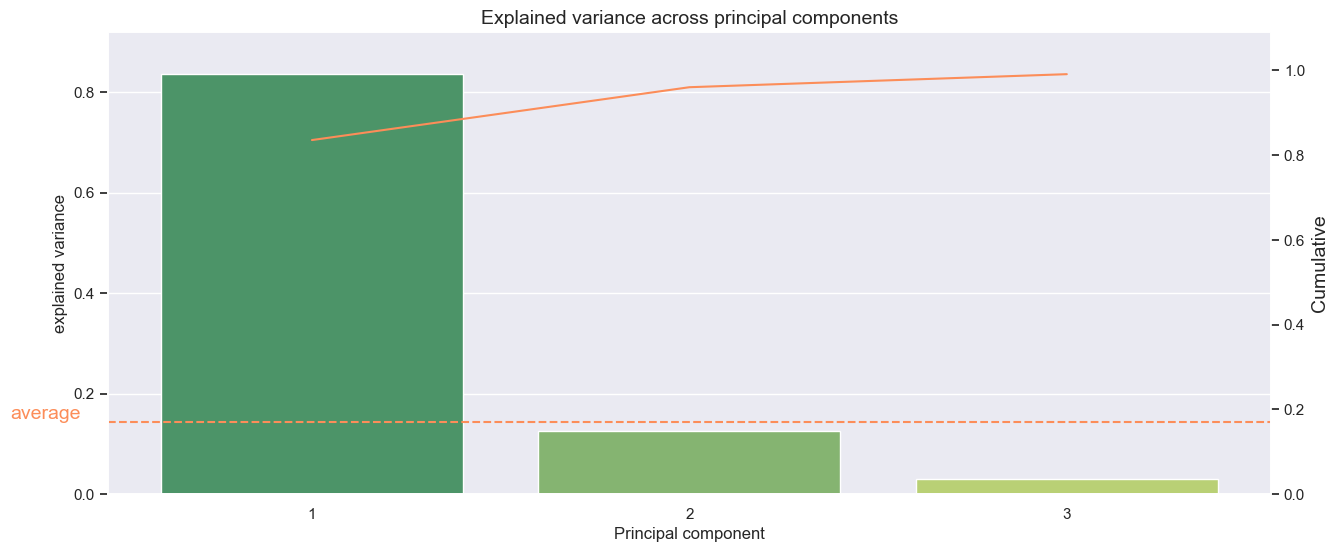

,x1,x10,x12,x2,x4,x5,x7,PC1,PC2,PC3
0,49.359178,25.851422,-10.337725,-21.626783,10.305796,14.607746,8.373217,2.562675,-0.646983,0.162074
1,55.649128,26.037642,-9.582749,-20.337816,7.548730,14.523496,9.662184,-4.239546,-2.605835,1.005798
2,58.116093,26.445252,-8.306297,-18.346651,9.716283,18.677543,11.653349,-7.982920,2.012437,-0.481003
3,43.452196,23.760152,-10.742232,-24.003563,11.938981,13.110701,5.996437,9.871436,-0.703641,0.864337
4,56.175669,24.844529,-9.019813,-19.596168,5.993732,13.447700,10.403832,-5.142263,-4.401822,0.283349


In [18]:
##### PCA analysis
factors_PCA = PCA_factors(data[['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7']], limit=3)
factors_PCA.head()

### comment your findings in section 3

# comment cell

The given dataset has 15 features and 1 target variable. 

##### extreme values & outliers & dist 
1. 'x14' and 'x15' are skewed, I decided to perform a log transform to better fit the bell-shape distribution assumption. 
2. 'x7' has one extreme value, 30, which is significantly larger than all other values, so I decided to treat it as a data outlier and replaced as nan. 
3. 'x11' ,'x13' and 'x14' has some noticeble extreme values. And I decided to use robust scaler to scale all features. 

##### categorical 
1. 'x8' is a categorical data, I decided to replace the values with 0 and 1. 

##### missing values 
1. 'x9' has 73.5% missing values, I decided to drop this variable. 
2. 'x6' has 6.3% missing values, which is acceptable. 
3. I decided to use sample median to replace missing values, there are other ways like, mean, most frequent values, etc.. 
4. Sparcity issue for rows is not significant, so I decided to keep all rows.

##### linear relationship
1. 'x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7' are highly correlated. I decided to perform a PCA to deal with the colinearity issue. I choice 3 components as the explaining power is good. 
2. 7 features has good linear relationship with y. (abs corr bigger than 0.2)


# 4. Process data set

## 4.1 train test split

In [19]:
train_ratio = 0.8

X, y = df.iloc[:,:-1], df['y']
num_observations = X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=train_ratio)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X shape: (1000, 15)
y shape: (1000,)
X_train shape: (800, 15)
y_train shape: (800,)
X_test shape: (200, 15)
y_test shape: (200,)


## 4.2 systematic data preprocessing

In [20]:
# clean/process the data based on observed patterns 

def data_processing(df, corr_cols = ['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7'], comp=3, imputer=None, pca=None):
    df = df.copy()
    
    ##### extreme values & dist  
    df['x7'] = df['x7'].replace(30,np.nan)
    df['x14'] = np.sign(df['x14'])*np.log(abs(df['x14']))
    df['x15'] = np.log(df['x15'])

    ##### categorical variables 
    df['x8'] = df['x8'].replace({1.2: 0, 2.0: 1})

    ##### PCA
    if imputer:
        df[corr_cols] = imputer.transform(df[corr_cols])
    else:
        imputer = SimpleImputer(strategy='mean')
        df[corr_cols] = imputer.fit_transform(df[corr_cols])

    if pca:
        principalComponents = pca.transform(df[corr_cols])
    else:        
        pca = PCA(n_components=comp)
        principalComponents = pca.fit_transform(df[corr_cols])
        
    principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(comp)])
    
    df = pd.concat([df.reset_index(drop=True), principalDf.reset_index(drop=True)], axis=1)
    
    return df, imputer, pca



In [21]:
##### preprocess training data 
X_train, imputer_train, pca_train = data_processing(df = X_train, corr_cols = ['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7'], comp=3)

display(X_train.head())
display(X_train.shape)

numerical_features = ['x3', 'x6', 'x8','x11','x13', 'x14', 'x15', 'PC1', 'PC2', 'PC3']


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,PC1,PC2,PC3
0,51.143721,-20.318006,0.082788,11.674218,17.397882,-0.251590,9.681994,0.000000,1.781080,26.168859,1.192569,-9.252491,-1.752921,-0.539877,-1.011198,-0.061635,2.371803,-0.933323
1,58.434662,-18.835211,1.304677,10.461521,19.188356,0.662136,11.164789,0.000000,0.582374,25.605698,-0.513978,-8.490297,-1.607631,0.101904,0.613697,-7.773258,2.949176,0.329191
2,57.898791,-18.438374,1.186244,8.431536,17.325056,2.124518,11.561626,0.000000,-1.470859,25.361973,1.727408,-7.645499,1.176617,-0.260534,-1.510204,-7.700198,0.218174,-0.698968
3,56.976308,-17.884108,2.438884,8.813325,17.499153,-2.495331,12.115892,0.000000,NaN,26.335014,0.249693,-8.686687,1.146521,0.096126,2.776842,-7.134110,0.643956,-1.556636
4,59.473118,-17.949209,0.362612,9.207714,18.913183,0.160798,12.050791,0.000000,NaN,26.095959,-0.017566,-7.504140,-0.619624,-0.140943,2.573605,-9.547303,1.936454,-0.714857


(800, 18)

## 4.3 build pipeline

In [ ]:
#  ColumnTransformer(
#      transformers=[
#          ("lg", FunctionTransformer(np.log1p), ['x14','x15']),
         
         
#      ])
    

In [22]:
numerical_transformer = Pipeline(steps=[   
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
#     ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scale', RobustScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features),         
    ]
)

##### evaluation - array 
X_train_trans = preprocessor.fit_transform(X_train[numerical_features])
X_train_trans.shape

(800, 10)

# comment cell
Based on data pattern I described above. 
I build a data processing function and ML pipeline to perform feature engineering. 
Mainly: <br>
customized: <br>
1. dist & extreme values 
2. categorical data treatment 

general: 
1. scaler 
2. imputer 
3. PCA


# 5. Build your machine learning model

In [23]:
def run_model(model_pipleline, X, y, metrics = ['accuracy', 'f1', 'precision', 'recall']):
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
    ##### Perform cross-validation
    scores = cross_validate(model_pipeline, X, y, cv=5, scoring=(*metrics,))
    
    rst = pd.DataFrame()
    for metric in metrics: 
        rst.loc[0,metric] = scores[f'test_{metric}'].mean()
#     rst = rst.style.format('{:.2%}')
#     display(rst)
    
    ##### fit pipeline
    model_pipeline.fit(X, y)
    
    return model_pipeline, rst


### Logistic Reg

In [24]:
model_pipeline = Pipeline([
     ('preprocessor', preprocessor),
     ('classifier', LogisticRegression())
])

model_pipeline, rst = run_model(model_pipeline, X_train, y_train)

rst.style.format('{:.2%}')

,accuracy,f1,precision,recall
0,83.38%,48.24%,62.93%,39.48%


In [25]:
rst = pd.DataFrame()

for reg in [1, 0.1, 0.01, 0.001]:
    model_pipeline = Pipeline([
         ('preprocessor', preprocessor),
         ('classifier', LogisticRegression(penalty='elasticnet', C=reg, solver='saga',l1_ratio=0.5))
    ])
    
    model_pipeline, tmp = run_model(model_pipeline, X_train, y_train)
    tmp.index = [reg]
    rst = pd.concat([rst, tmp])
    
rst.sort_values(by='f1', ascending=False).style.format('{:.2%}')

,accuracy,f1,precision,recall
1.000000,83.25%,48.45%,61.84%,40.12%
0.100000,83.38%,39.00%,69.67%,27.30%
0.010000,80.38%,0.00%,0.00%,0.00%
0.001000,80.38%,0.00%,0.00%,0.00%


### RandomForest

In [26]:
min_samples_split_list = [2, 3, 5]
max_depth_list = [3, 7, 15]
n_estimators_list = [5, 20, 50, 150]

rst = pd.DataFrame()

for min_samples_split in min_samples_split_list:
    for max_depth in max_depth_list:
        for n_estimators in n_estimators_list:
            
            model_pipeline = Pipeline([
                 ('preprocessor', preprocessor),
                 ('classifier', RandomForestClassifier(min_samples_split=min_samples_split,
                                               max_depth=max_depth, 
                                               n_estimators=n_estimators,
                                               random_state=0))
            ])

            model_pipeline, tmp = run_model(model_pipeline, X_train, y_train)
            
            tmp.index = [f'min_samples_split:{min_samples_split}*max_depth:{max_depth}*n_estimators:{n_estimators}']
            rst = pd.concat([rst, tmp])
            
rst.sort_values(by='f1', ascending=False).style.format('{:.2%}')

,accuracy,f1,precision,recall
min_samples_split:3*max_depth:7*n_estimators:5,81.50%,42.53%,54.03%,36.15%
min_samples_split:3*max_depth:15*n_estimators:50,82.62%,41.77%,59.77%,32.36%
min_samples_split:3*max_depth:15*n_estimators:20,83.12%,41.69%,64.40%,31.13%
min_samples_split:2*max_depth:15*n_estimators:50,82.88%,41.60%,63.89%,31.13%
min_samples_split:5*max_depth:15*n_estimators:20,81.88%,40.87%,57.59%,31.77%
min_samples_split:3*max_depth:7*n_estimators:50,83.25%,40.87%,66.96%,29.88%
min_samples_split:3*max_depth:15*n_estimators:5,79.88%,40.36%,47.97%,34.98%
min_samples_split:5*max_depth:7*n_estimators:50,82.75%,40.03%,64.37%,29.23%
min_samples_split:3*max_depth:7*n_estimators:20,82.37%,39.52%,59.41%,29.86%
min_samples_split:3*max_depth:7*n_estimators:150,83.25%,39.50%,69.08%,27.94%


### AdaBoost

In [63]:
min_samples_split_list = [2, 3, 5]
max_depth_list = [5, 10, 20]
n_estimators_list = [5, 50, 150]

rst = pd.DataFrame()

for min_samples_split in min_samples_split_list:
    for max_depth in max_depth_list:
        for n_estimators in n_estimators_list:
            
            model_pipeline = Pipeline([
                 ('preprocessor', preprocessor),
                 ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split), n_estimators=n_estimators, algorithm='SAMME'))
            ])
            
            model_pipeline, tmp = run_model(model_pipeline, X_train, y_train)
            
            tmp.index = [f'min_samples_split:{min_samples_split}*max_depth:{max_depth}*n_estimators:{n_estimators}']
            rst = pd.concat([rst, tmp])
            
rst.sort_values(by='f1', ascending=False).style.format('{:.2%}')

,accuracy,f1,precision,recall
min_samples_split:5*max_depth:5*n_estimators:50,81.75%,45.31%,54.55%,38.81%
min_samples_split:3*max_depth:5*n_estimators:50,82.88%,44.85%,60.84%,35.62%
min_samples_split:3*max_depth:5*n_estimators:150,82.38%,42.54%,59.32%,33.67%
min_samples_split:2*max_depth:5*n_estimators:150,81.88%,42.09%,56.21%,33.69%
min_samples_split:3*max_depth:20*n_estimators:5,78.00%,41.84%,44.03%,40.65%
min_samples_split:3*max_depth:10*n_estimators:5,79.75%,41.80%,47.71%,37.48%
min_samples_split:5*max_depth:5*n_estimators:150,81.25%,41.29%,52.63%,34.29%
min_samples_split:2*max_depth:5*n_estimators:50,81.50%,41.12%,55.05%,33.04%
min_samples_split:5*max_depth:5*n_estimators:5,78.75%,41.12%,45.64%,37.54%
min_samples_split:2*max_depth:10*n_estimators:5,78.75%,38.59%,45.36%,33.75%


In [ ]:
lgb.LGBMClassifier

# comment cell
As this is Classification Problem: 
1. I started from the Logistic regression as the foundation/benchmark, which explained the linear relationship between variables. 
2. On top of it, I explored ensemple model like randomforest and Adaboost, as there are non-linear relationship between dependent and independent variables. 
3. The cross-validated backtest results are evaluated based on the tradeoff between bias and variance. I want a model with good performance and ideally avoid overfitting (sustainable). 

# 6. Model evaluation

### Test set performance

In [28]:
##### preprocess test data 
X_test, _, _ = data_processing(df = X_test, corr_cols = ['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7'], comp=3, imputer=imputer_train, pca=pca_train)


In [50]:
y_test.value_counts()

y
0    161
1     39
Name: count, dtype: int64

## 6.1 Out-of-sample Performance

In [82]:
##### best model selected 
model_pipeline = Pipeline([
     ('preprocessor', preprocessor),
#      ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=3), n_estimators=50, algorithm='SAMME'))
    ('classifier', LogisticRegression(penalty='elasticnet', C=1, solver='saga',l1_ratio=0.5))
])

model_pipeline, train_performance = run_model(model_pipeline, X_train, y_train)
print('Training performance:')
display(train_performance.style.format('{:.2%}'))

##### perform on test data 
y_pred = model_pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred)


print(f'Selected Model out-of-sample F1: {f1: .2%}')

Training performance:


,accuracy,f1,precision,recall
0,83.25%,48.45%,61.84%,40.12%


Selected Model out-of-sample F1:  57.14%


## 6.2 Feature Importance

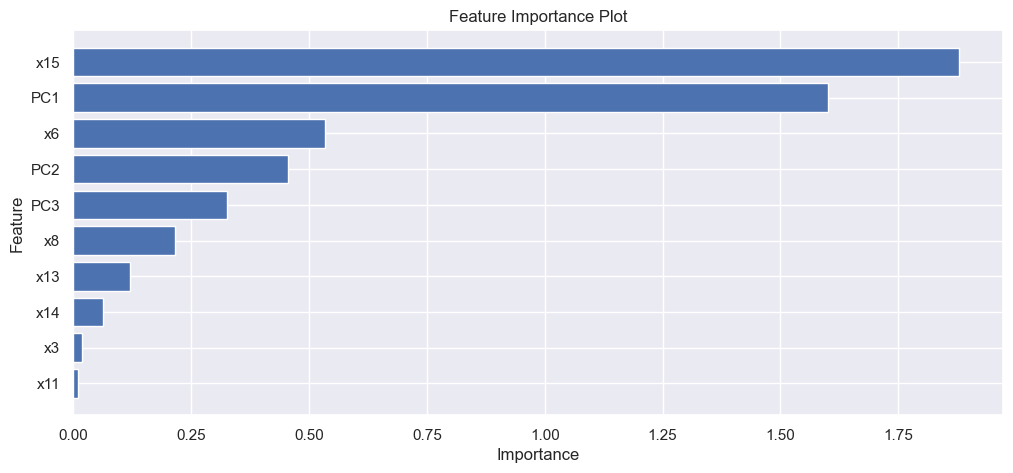

In [98]:
##### Logistic Reg Coef 
importances = model_pipeline.named_steps['classifier'].coef_[0]
feature_importance_df = pd.DataFrame({'feature':numerical_features,'importance':importances}).sort_values(by='importance', key=abs)

plt.figure(figsize=(12, 5))
plt.barh(feature_importance_df.feature, abs(feature_importance_df.importance))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show();

In [101]:
# model_pipeline = Pipeline([
#                  ('preprocessor', preprocessor),
#                  ('classifier', RandomForestClassifier(min_samples_split=min_samples_split,
#                                                max_depth=max_depth, 
#                                                n_estimators=n_estimators,
#                                                random_state=0))
#             ])

# model_pipeline, tmp = run_model(model_pipeline, X_train, y_train)

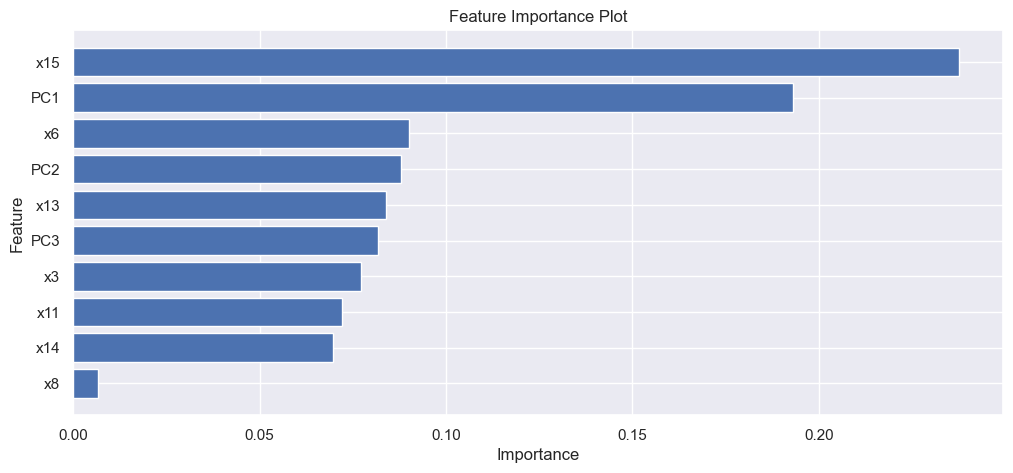

In [102]:
##### Ensemple Model Feature Importance 
importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'feature':numerical_features,'importance':importances}).sort_values(by='importance', key=abs)

plt.figure(figsize=(12, 5))
plt.barh(feature_importance_df.feature, feature_importance_df.importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show();

## 6.3 Performance Metrics

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[150  11]
 [ 19  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       161
           1       0.65      0.51      0.57        39

    accuracy                           0.85       200
   macro avg       0.77      0.72      0.74       200
weighted avg       0.84      0.85      0.84       200



## 6.4 ROC - AUC

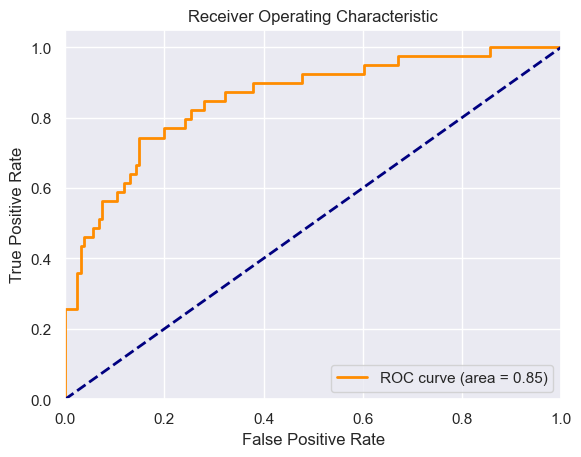

In [49]:
y_prob = model_pipeline.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show();


## 6.5 Precision-Recall Curve - AUC

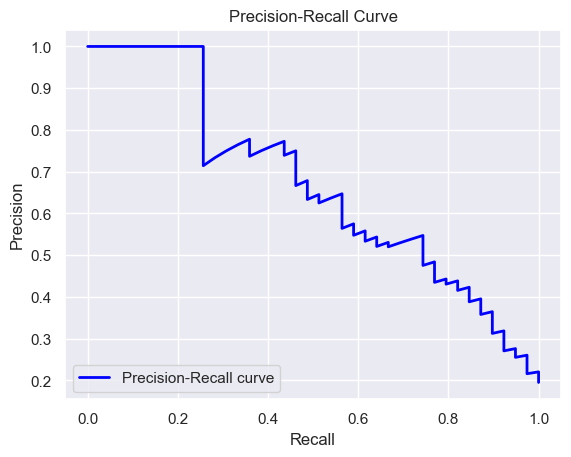

In [31]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)


plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show();

### comment on your model performance and discuss how you would improve the model given the performance

Based on the model performance of the train data, I selected the randomforest with customized sets of parameters. 
And tested the model on test data, the results are reasonable. 

# 7. Final comments

### place your final comments and additional thoughts here

# comment cell
If there's more time, I would perform deep analysis on y variable, to further deal with the imbalance issue. And I would further explore other ML models. 

resampling 